In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [18]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
data = Path('lending_data.csv')
df = pd.read_csv(data)
df.head()

# Review the DataFrame
df.head()
# df.describe
grouped_by_loanstatus_df = df.groupby('loan_status').mean()
grouped_by_loanstatus_df

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
loan_status,,,,,,,
0,9515.627166,7.169118,48062.314089,0.368549,3.565968,0.333533,18062.314089
1,18507.800000,10.990529,84027.720000,0.640501,11.649600,2.156400,54027.720000


In [3]:
# Create a DataFrame with the scaled data
df_scaled =  StandardScaler().fit_transform(df[["loan_size","interest_rate","borrower_income","debt_to_income","num_of_accounts","derogatory_marks","total_debt"]])
df_scaled = pd.DataFrame(df_scaled , columns=["loan_size","interest_rate","borrower_income","debt_to_income","num_of_accounts","derogatory_marks","total_debt"])

# Copy the 'loan_status' column from 'df' to 'df_scaled'
df_scaled['loan_status'] = df['loan_status']

# Display sample data
df_scaled.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,0.427304,0.426837,0.427404,0.668571,0.616143,1.043996,0.427404,0
1,-0.671487,-0.674918,-0.671552,-0.802166,-0.434049,-0.673973,-0.671552,0
2,-0.384846,-0.370249,-0.372922,-0.344424,-0.434049,-0.673973,-0.372922,0
3,0.427304,0.417844,0.415459,0.655346,0.616143,1.043996,0.415459,0
4,0.475078,0.456068,0.451295,0.694873,0.616143,1.043996,0.451295,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [4]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df_scaled ["loan_status"]
# Separate the X variable, the features
X = df_scaled .drop(columns="loan_status")

In [5]:
# Review the y variable Series
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [6]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,0.427304,0.426837,0.427404,0.668571,0.616143,1.043996,0.427404
1,-0.671487,-0.674918,-0.671552,-0.802166,-0.434049,-0.673973,-0.671552
2,-0.384846,-0.370249,-0.372922,-0.344424,-0.434049,-0.673973,-0.372922
3,0.427304,0.417844,0.415459,0.655346,0.616143,1.043996,0.415459
4,0.475078,0.456068,0.451295,0.694873,0.616143,1.043996,0.451295


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [7]:
# Check the balance of our target values
counts = y.value_counts()
formatted_counts = counts.apply(lambda x: "{:,}".format(x))
print(formatted_counts)


0    75,036
1     2,500
Name: loan_status, dtype: object


### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [8]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1,stratify=y)
X_train.shape

(58152, 7)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [9]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [10]:
# Get the training and testing data score.
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9939297014720044
Testing Data Score: 0.9947379281881964


### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [11]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [12]:
# Print the balanced_accuracy score of the model
accuracy_score(y_test, predictions)

0.9947379281881964

In [13]:
# Generate a confusion matrix for the model
training_matrix = confusion_matrix(y_test, predictions)
print(training_matrix)

[[18669    90]
 [   12   613]]


In [14]:
# Print the classification report for the model
testing_report = classification_report(y_test, predictions)
print(testing_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.98      0.92       625

    accuracy                           0.99     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** WRITE YOUR ANSWER HERE!

In [26]:
print("The logistic regression model predicts the healthy and high-risk loans with a 99% accuracy.")


The logistic regression model predicts the healthy and high-risk loans with a 99% accuracy.


---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [18]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [19]:
# Count the distinct values of the resampled labels data
label_counts = pd.Series(y_train_resampled).value_counts()

print(label_counts)

0    56277
1    56277
Name: loan_status, dtype: int64


### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [20]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier

# Fit the model using the resampled training data
classifier.fit(X_train_resampled, y_train_resampled)

# Make a prediction using the testing data
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [21]:
# Print the balanced_accuracy score of the model 
accuracy_score(y_test, predictions)

0.9948926950061907

In [22]:
# Generate a confusion matrix for the model
training_matrix = confusion_matrix(y_test, predictions)
print(training_matrix)

[[18662    97]
 [    2   623]]


In [23]:
# Print the classification report for the model
testing_report = classification_report(y_test, predictions)
print(testing_report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18759
           1       0.87      1.00      0.93       625

    accuracy                           0.99     19384
   macro avg       0.93      1.00      0.96     19384
weighted avg       1.00      0.99      1.00     19384



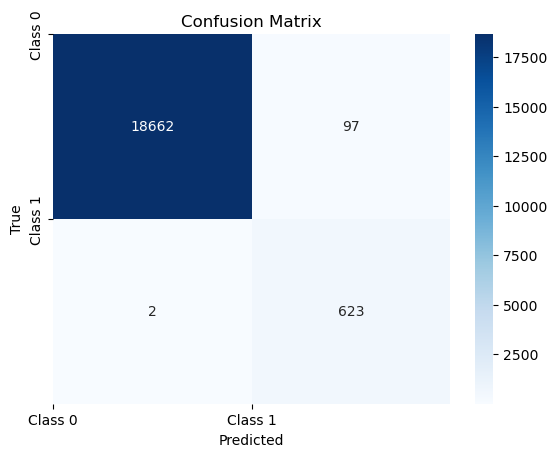

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Set labels, title, and axis ticks
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.xticks([0, 1], ["Class 0", "Class 1"])
plt.yticks([0, 1], ["Class 0", "Class 1"])

# Show the plot
plt.show()

### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** YOUR ANSWER HERE!

In [ ]:
print("The logistic regression model with oversampled data, predicts the healthy and high-risk loans with a 99% accuracy.")

In [22]:
print("""
Credit Risk Analysis Report
      
Provide an overview that explains the purpose of this analysis: The goal of this model is to predict which clients are healthy and high-risk, in other words, to predict the clients who will be in default.

Using a bulleted list, describe the accuracy, precision, and recall scores of the machine learning model:
  - Accuracy: The accuracy of the machine learning model is 0.99, which means it correctly predicts the loan status (healthy or high-risk) for 99% of the total samples in the dataset.
  - Precision: Precision is a measure of how many of the predicted high-risk loans (class 1) are actually high-risk. In this case, the precision for class 1 is 0.87, indicating that 87% of the loans predicted as high-risk are indeed high-risk.
  - Recall (Sensitivity or True Positive Rate): Recall measures the ability of the model to correctly identify the high-risk loans (class 1) out of all the actual high-risk loans. The recall for class 1 is 1.00, meaning that the model correctly identifies all the high-risk loans in the dataset.

Summarize the results from the machine learning model. Include your justification for recommending the model for use by the company. If you don’t recommend the model, justify your reasoning. (10 points)
  High Accuracy: The model achieves an accuracy of 0.99, indicating that it correctly predicts the loan status (healthy or high-risk) for 99% of the total samples in the dataset.
  High Precision: The precision for high-risk loans (class 1) is 0.87, implying that 87% of the loans predicted as high-risk are indeed high-risk.
  Perfect Recall: The recall for high-risk loans (class 1) is 1.00, indicating that the model correctly identifies all the high-risk loans in the dataset.
  Balanced F1-Score: The F1-score for high-risk loans (class 1) is 0.93, which demonstrates a good balance between precision and recall for identifying high-risk loans.

The company can benefit from using this model. The high accuracy implies that it can significantly contribute to making informed decisions in loan risk assessment, potentially reducing the company's exposure to high-risk loans. The high precision and recall for high-risk loans indicate the model's ability to accurately identify loans that have a higher likelihood of default or financial issues.

By leveraging this model, the company can make more reliable and efficient loan decisions, prioritize risk mitigation strategies, and potentially enhance its overall portfolio performance. It is important, however, to continue monitoring the model's performance over time and evaluate its robustness in different scenarios to ensure its continued effectiveness.
""")



Credit Risk Analysis Report
      
Provide an overview that explains the purpose of this analysis: The goal of this model is to predict which clients are healthy and high-risk, in other words, to predict the clients who will be in default.

Using a bulleted list, describe the accuracy, precision, and recall scores of the machine learning model:
  - Accuracy: The accuracy of the machine learning model is 0.99, which means it correctly predicts the loan status (healthy or high-risk) for 99% of the total samples in the dataset.
  - Precision: Precision is a measure of how many of the predicted high-risk loans (class 1) are actually high-risk. In this case, the precision for class 1 is 0.87, indicating that 87% of the loans predicted as high-risk are indeed high-risk.
  - Recall (Sensitivity or True Positive Rate): Recall measures the ability of the model to correctly identify the high-risk loans (class 1) out of all the actual high-risk loans. The recall for class 1 is 1.00, meaning that